
# **[군장병 AI 기본1] Image Processing**

* ### Hak Gu Kim, Ph.D.
  * ### Assistant Professor
  * ### Graduate School of Advanced Imaging Science, Multimedia & Film (GSAIM)
  * ### Chung-Ang University
  * ### Webpage: www.irislab.cau.ac.kr


# **Programming Practice IV: K-NN Image Classification**
### 1. Understande K-MM Image Classification code
* ### This code is from https://cs231n.github.io/classification/

### 2. Change the number of *K* or the distance function (L1, L2, etc.)




## **[Step 0]** Environmental Setting

1. Clone repo to download supporting python files
2. Install Python dependencies with pip
3. Download CIFAR-10 data set

In [ ]:
cd /content

/content


In [ ]:
!ls

sample_data


In [ ]:
!git clone https://github.com/nholmber/google-colab-cs231n.git

Cloning into 'google-colab-cs231n'...
remote: Enumerating objects: 109, done.
remote: Total 109 (delta 0), reused 0 (delta 0), pack-reused 109 (from 1)
Receiving objects: 100% (109/109), 5.07 MiB | 7.14 MiB/s, done.
Resolving deltas: 100% (54/54), done.


In [ ]:
%cd google-colab-cs231n/assignment1

/content/google-colab-cs231n/assignment1


In [ ]:
!pip install imageio

In [ ]:
%cd cs231n/datasets/
!ls

/content/google-colab-cs231n/assignment1/cs231n/datasets
get_datasets.sh


In [ ]:
!more get_datasets.sh

# Get CIFAR10
wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
tar -xzvf cifar-10-python.tar.gz
rm cifar-10-python.tar.gz 


In [ ]:
!./get_datasets.sh

--2024-09-02 03:47:04--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  66.9MB/s    in 2.4s    

2024-09-02 03:47:07 (66.9 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [ ]:
%cd ../..
!ls

/content/google-colab-cs231n/assignment1
collectSubmission.sh  knn.ipynb		    softmax.ipynb	       two_layer_net.ipynb
cs231n		      README.md		    start_ipython_osx.sh
features.ipynb	      requirements.txt	    svm.ipynb
frameworkpython       setup_googlecloud.sh  two_layer_net_colab.ipynb


## **[Practice IV-1]** Understand data loading for KNN


In [ ]:
import random
import numpy as np
# CIFAR-10 데이터셋을 로드하기 위한 함수 임포트
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

# Python 2와 3의 호환성을 위해 print를 함수처럼 사용하도록 설정
from __future__ import print_function

# Jupyter Notebook에서 Matplotlib 그래프를 새로운 창이 아닌 노트북 내에 표시되도록 설정
%matplotlib inline

# 그래프의 기본 크기를 가로 10.0, 세로 8.0으로 설정
plt.rcParams['figure.figsize'] = (10.0, 8.0)

# 이미지 보간(interpolation) 방법을 'nearest'로 설정, 이미지 확대 시 픽셀을 선명하게 표시
plt.rcParams['image.interpolation'] = 'nearest'

# 이미지의 기본 색상 맵을 회색조(grayscale)로 설정
plt.rcParams['image.cmap'] = 'gray'

# 외부 Python 모듈이 변경되었을 때 자동으로 리로드되도록 설정
%load_ext autoreload

# 모든 모듈이 자동으로 다시 로드되도록 설정
%autoreload 2

import inspect
from pygments import highlight
from pygments.lexers import PythonLexer
from pygments.formatters import Terminal256Formatter

def pretty_print(func):
    # 함수의 소스 코드를 리스트 형태로 가져옴
    source_code = inspect.getsourcelines(func)[0]

    # 소스 코드의 각 줄을 순회하며 하이라이트하여 출력
    for line in source_code:
        print(highlight(line.strip('\n'), PythonLexer(), Terminal256Formatter()), end='')
    print('')


In [ ]:
# CIFAR-10 데이터셋이 저장된 디렉토리 경로를 설정
cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'

# 변수를 정리하여 메모리 문제를 방지하기 위해 이전에 로드된 데이터 삭제 시도
try:
   # 만약 이전에 CIFAR-10 데이터를 로드한 적이 있다면, 해당 변수를 삭제하여 메모리 확보
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')  # 데이터가 성공적으로 삭제되었음을 출력
except:
   pass  # 예외가 발생하면 아무것도 하지 않고 넘어감 (예: 변수가 처음 로드된 경우)

# CIFAR-10 데이터셋을 로드하여 훈련 데이터(X_train, y_train)와 테스트 데이터(X_test, y_test)로 분리
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# 데이터가 올바르게 로드되었는지 확인하기 위해 훈련 및 테스트 데이터의 크기를 출력
print('Training data shape: ', X_train.shape)  # 훈련 데이터의 형태 출력
print('Training labels shape: ', y_train.shape)  # 훈련 데이터의 레이블 형태 출력
print('Test data shape: ', X_test.shape)  # 테스트 데이터의 형태 출력
print('Test labels shape: ', y_test.shape)  # 테스트 데이터의 레이블 형태 출력


Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


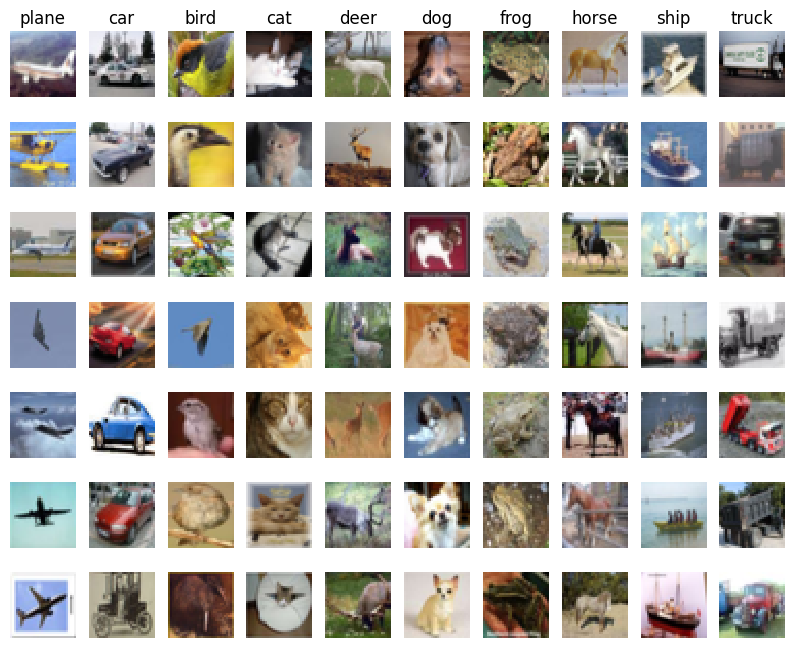

In [ ]:
# CIFAR-10 데이터셋에 포함된 10가지 클래스 이름을 리스트로 정의
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 클래스의 총 개수를 계산하여 변수에 저장
num_classes = len(classes)

# 각 클래스당 샘플로 보여줄 이미지 개수를 설정
samples_per_class = 7

# 각 클래스에 대해 루프를 실행하여 이미지를 시각화
for y, cls in enumerate(classes):
    # 현재 클래스(y)에 해당하는 모든 이미지의 인덱스를 가져옴
    idxs = np.flatnonzero(y_train == y)

    # 위에서 찾은 인덱스 중에서 랜덤하게 samples_per_class 만큼 선택
    idxs = np.random.choice(idxs, samples_per_class, replace=False)

    # 선택된 각 이미지에 대해 서브플롯에 그리기
    for i, idx in enumerate(idxs):
        # 서브플롯의 위치를 계산
        plt_idx = i * num_classes + y + 1

        # 지정된 위치에 서브플롯을 생성
        plt.subplot(samples_per_class, num_classes, plt_idx)

        # 선택된 이미지를 서브플롯에 그리기
        plt.imshow(X_train[idx].astype('uint8'))

        # 축을 표시하지 않도록 설정
        plt.axis('off')

        # 첫 번째 열에 해당하는 경우, 클래스 이름을 타이틀로 설정
        if i == 0:
            plt.title(cls)

# 모든 서브플롯을 화면에 표시
plt.show()


In [ ]:
# 훈련 데이터에서 사용할 샘플 수를 5000개로 설정
num_training = 5000

# 0부터 num_training까지의 숫자를 생성하여 마스크(mask)로 사용
mask = list(range(num_training))

# X_train과 y_train 데이터를 마스크를 사용하여 5000개의 샘플로 서브셋팅
X_train = X_train[mask]
y_train = y_train[mask]

# 테스트 데이터에서 사용할 샘플 수를 500개로 설정
num_test = 500

# 0부터 num_test까지의 숫자를 생성하여 마스크(mask)로 사용
mask = list(range(num_test))

# X_test와 y_test 데이터를 마스크를 사용하여 500개의 샘플로 서브셋팅
X_test = X_test[mask]
y_test = y_test[mask]


## **[Practice IV-2]** Understand KNN


In [ ]:
# 훈련 이미지 데이터를 행렬 형태로 변환
# X_train의 각 이미지를 1차원 벡터로 변환하고, 모든 이미지를 행(row)으로 배열
# X_train.shape[0]는 이미지의 개수, -1은 나머지 차원을 자동으로 계산하라는 의미
X_train = np.reshape(X_train, (X_train.shape[0], -1))

# 테스트 이미지 데이터도 동일하게 행렬 형태로 변환
X_test = np.reshape(X_test, (X_test.shape[0], -1))

# 변환된 훈련 데이터와 테스트 데이터의 새로운 형태를 출력
print(X_train.shape, X_test.shape)


(5000, 3072) (500, 3072)


In [ ]:
# K-최근접 이웃(K-Nearest Neighbor) 분류기를 임포트
from cs231n.classifiers import KNearestNeighbor

# kNN 분류기 인스턴스 생성
# kNN은 비지도 학습 알고리즘으로, 학습 단계에서는 데이터를 단순히 저장만 하고 추가적인 처리를 하지 않음
classifier = KNearestNeighbor()

# kNN 분류기에 훈련 데이터와 레이블을 제공하여 "학습"시킴
# 이 단계에서 분류기는 데이터를 기억할 뿐, 별도의 모델을 학습하거나 가중치를 조정하지 않음
classifier.train(X_train, y_train)


## **[Practice IV-3]** Change the number of *K* or the distance function

We would now like to classify the test data with the kNN classifier. Recall that we can break down this process into two steps:

1. First we must compute the distances between all test examples and all train examples.
2. Given these distances, for each test example we find the k nearest examples and have them vote for the label

Lets begin with computing the distance matrix between all training and test examples. For example, if there are **Ntr** training examples and **Nte** test examples, this stage should result in a **Nte x Ntr** matrix where each element (i,j) is the distance between the i-th test and j-th train example.

First, open `cs231n/classifiers/k_nearest_neighbor.py` and implement the function `compute_distances_two_loops` that uses a (very inefficient) double loop over all pairs of (test, train) examples and computes the distance matrix one element at a time.

In [ ]:
# cs231n/classifiers/k_nearest_neighbor.py 파일을 열고
# compute_distances_two_loops 함수를 구현해야 합니다.
# 이 함수는 두 개의 루프를 사용하여 훈련 데이터와 테스트 데이터 사이의 거리를 계산합니다.

# 구현된 함수를 테스트하기 위해 다음 코드를 실행
# 테스트 데이터와 훈련 데이터 간의 거리를 계산
dists = classifier.compute_distances_two_loops(X_test)

# 계산된 거리 행렬의 형태를 출력하여 올바르게 동작하는지 확인 (주석 처리된 상태)
# print(dists.shape)


In [ ]:
# Now implement the function predict_labels and run the code below:
# We use k = 1 (which is Nearest Neighbor).
y_test_pred = classifier.predict_labels(dists, k=1)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 137 / 500 correct => accuracy: 0.274000


You should expect to see approximately `27%` accuracy. Now lets try out a larger `k`, say `k = 5`:

In [ ]:
# 이제 predict_labels 함수를 구현해야 합니다.
# 이 함수는 거리 행렬을 기반으로 테스트 데이터의 레이블을 예측하는 역할을 합니다.

# k 값을 1로 설정하여 가장 가까운 이웃(Nearest Neighbor)만을 고려하여 레이블을 예측
y_test_pred = classifier.predict_labels(dists, k=1)

# 올바르게 예측된 테스트 샘플의 수를 계산
num_correct = np.sum(y_test_pred == y_test)

# 정확도를 계산하기 위해 올바르게 예측된 샘플 수를 전체 테스트 샘플 수로 나눔
accuracy = float(num_correct) / num_test

# 정확도와 올바르게 예측된 샘플 수를 출력
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))


Got 139 / 500 correct => accuracy: 0.278000


You should expect to see a slightly better performance than with `k = 1`.

### Cross-validation

We have implemented the k-Nearest Neighbor classifier but we set the value k = 5 arbitrarily. We will now determine the best value of this hyperparameter with cross-validation.

In [ ]:
# 교차 검증을 위한 폴드 수 설정 (k-fold cross-validation)
num_folds = 5

# k-값의 후보 리스트를 설정 (k는 k-최근접 이웃 알고리즘에서 고려할 이웃의 수)
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

# 훈련 데이터셋이 num_folds로 균등하게 나눠질 수 있는지 확인
if num_training / num_folds % num_folds != 0.0:
    raise ValueError('Number of training examples not evenly divisible by number of folds.')

# 훈련 데이터를 num_folds 개의 리스트로 분할하여 각 폴드에 할당
X_train_folds = np.split(X_train, num_folds)
y_train_folds = np.split(y_train, num_folds)

# 교차 검증 동안 k 값별로 정확도를 저장할 딕셔너리 초기화
# 교차 검증을 수행한 후, k_to_accuracies[k]에는 각 k 값에 대해 num_folds 길이의 정확도 리스트가 저장됨
k_to_accuracies = {}

# k-fold 교차 검증을 수행하여 최적의 k 값을 찾음
# 외부 루프에서는 num_folds에 대해 반복하여 각 k 값에 대해 계산된 거리를 재사용
for k in k_choices:
    k_to_accuracies[k] = []

# num_folds에 대해 루프를 실행하여 교차 검증을 수행
for idx in range(num_folds):
    # 현재 폴드(idx)를 검증 세트로 사용하고 나머지를 훈련 세트로 사용
    X_train_set = np.concatenate((*X_train_folds[:idx], *X_train_folds[idx+1:]), axis=0)
    y_train_set = np.concatenate((*y_train_folds[:idx], *y_train_folds[idx+1:]), axis=0)
    X_validation_set = X_train_folds[idx]
    y_validation_set = y_train_folds[idx]
    num_validation_set = X_validation_set.shape[0]

    # kNN 분류기 학습
    classifier = KNearestNeighbor()
    classifier.train(X_train_set, y_train_set)

    # 검증 세트에 대한 거리를 계산 (루프 없이 계산하는 방법 사용)
    dists_validate = classifier.compute_distances_no_loops(X_validation_set)

    # k 값에 대해 레이블을 예측하고 정확도를 계산
    for k in k_choices:
        # 검증 세트에 대한 레이블 예측
        y_validation_pred = classifier.predict_labels(dists_validate, k=k)

        # 정확도 계산
        accuracy = (float(np.sum(np.equal(y_validation_pred, y_validation_set))) / num_validation_set)

        # 해당 k 값에 대한 정확도를 딕셔너리에 추가
        k_to_accuracies[k].append(accuracy)

# 계산된 정확도를 출력
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))


k = 1, accuracy = 0.263000
k = 1, accuracy = 0.257000
k = 1, accuracy = 0.264000
k = 1, accuracy = 0.278000
k = 1, accuracy = 0.266000
k = 3, accuracy = 0.239000
k = 3, accuracy = 0.249000
k = 3, accuracy = 0.240000
k = 3, accuracy = 0.266000
k = 3, accuracy = 0.254000
k = 5, accuracy = 0.248000
k = 5, accuracy = 0.266000
k = 5, accuracy = 0.280000
k = 5, accuracy = 0.292000
k = 5, accuracy = 0.280000
k = 8, accuracy = 0.262000
k = 8, accuracy = 0.282000
k = 8, accuracy = 0.273000
k = 8, accuracy = 0.290000
k = 8, accuracy = 0.273000
k = 10, accuracy = 0.265000
k = 10, accuracy = 0.296000
k = 10, accuracy = 0.276000
k = 10, accuracy = 0.284000
k = 10, accuracy = 0.280000
k = 12, accuracy = 0.260000
k = 12, accuracy = 0.295000
k = 12, accuracy = 0.279000
k = 12, accuracy = 0.283000
k = 12, accuracy = 0.280000
k = 15, accuracy = 0.252000
k = 15, accuracy = 0.289000
k = 15, accuracy = 0.278000
k = 15, accuracy = 0.282000
k = 15, accuracy = 0.274000
k = 20, accuracy = 0.270000
k = 20, accu

k = 1, average accuracy = 0.265600
k = 3, average accuracy = 0.249600
k = 5, average accuracy = 0.273200
k = 8, average accuracy = 0.276000
k = 10, average accuracy = 0.280200
k = 12, average accuracy = 0.279400
k = 15, average accuracy = 0.275000
k = 20, average accuracy = 0.279000
k = 50, average accuracy = 0.274400
k = 100, average accuracy = 0.261600


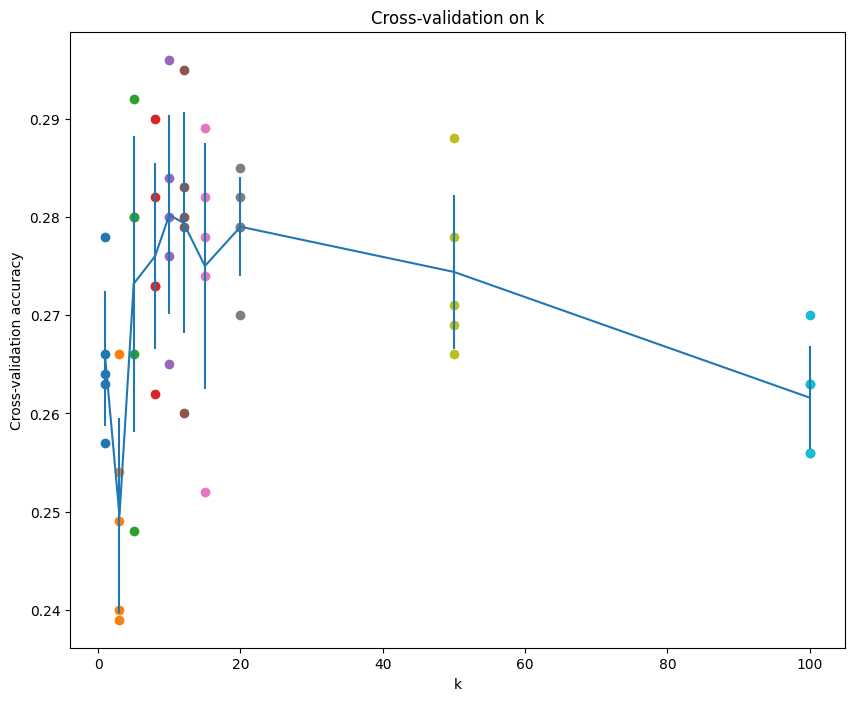

In [ ]:
# k 값에 따른 정확도(raw observations)를 시각화
for k in k_choices:
    # 각 k 값에 대한 정확도 리스트를 가져옴
    accuracies = k_to_accuracies[k]

    # k 값에 대한 평균 정확도를 출력
    print('k = %d, average accuracy = %f' % (k, np.average(accuracies)))

    # 각 k 값에 대해 정확도 값을 점으로 표시 (scatter plot)
    plt.scatter([k] * len(accuracies), accuracies)

# 트렌드 라인을 그리기 위해 각 k 값에 대한 평균 정확도와 표준 편차를 계산
accuracies_mean = np.array([np.mean(v) for k, v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k, v in sorted(k_to_accuracies.items())])

# 평균 정확도를 트렌드 라인으로 표시하고, 표준 편차를 사용해 에러 바(error bars)를 추가
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)

# 그래프의 제목 설정
plt.title('Cross-validation on k')

# x축 라벨 설정 (k 값)
plt.xlabel('k')

# y축 라벨 설정 (교차 검증 정확도)
plt.ylabel('Cross-validation accuracy')

# 그래프를 화면에 표시
plt.show()
